In [137]:
import json

with open('train.jsonl', 'r') as f:
    train_data = f.readlines()#json.load(f)

print(train_data[:1])

['{"title": "2006 Pangandaran earthquake and tsunami", "id": "8307a6b61b84d4eea42c1dd5e6e2cdba", "content": [{"sentence": "The 2006 Pangandaran earthquake and tsunami occurred on July 17 at along a subduction zone off the coast of west and central Java, a large and densely populated island in the Indonesian archipelago.", "tokens": ["The", "2006", "Pangandaran", "earthquake", "and", "tsunami", "occurred", "on", "July", "17", "at", "along", "a", "subduction", "zone", "off", "the", "coast", "of", "west", "and", "central", "Java", ",", "a", "large", "and", "densely", "populated", "island", "in", "the", "Indonesian", "archipelago", "."]}, {"sentence": "The shock had a moment magnitude of 7.7 and a maximum perceived intensity of IV (\\"Light\\") in Jakarta, the capital and largest city of Indonesia.", "tokens": ["The", "shock", "had", "a", "moment", "magnitude", "of", "7.7", "and", "a", "maximum", "perceived", "intensity", "of", "IV", "(", "``", "Light", "\'\'", ")", "in", "Jakarta", ",", "

In [138]:
len(train_data)

2913

In [139]:
#train_events = []
train_events = [json.loads(x) for x in train_data]

In [124]:
len(train_events)

2913

In [27]:
train_events[0].keys()

dict_keys(['title', 'id', 'content', 'events', 'negative_triggers'])

In [28]:
len(train_events[0]['content'])

9

In [29]:
train_events[0]['content'][0].keys()

dict_keys(['sentence', 'tokens'])

### Calculate the maximum number of items per article:
- sentences
- tokens
- events

In [30]:
max_sent_cnt = 0
max_doc_len = 0
max_num_evt = 0
max_evt = None

for evt in train_events:
    if max_sent_cnt < len(evt['content']):
        max_sent_cnt = len(evt['content'])
        max_sent_cnt_evt = evt
    max_num_evt = len(evt['events']) if max_num_evt < len(evt['events']) else max_num_evt
    tmp_doc_len = 0
    for sent in evt['content']:
        tmp_doc_len += len(sent['tokens'])
    max_doc_len = tmp_doc_len if max_doc_len < tmp_doc_len else max_doc_len

print('max_sent_cnt', max_sent_cnt)
print('max_doc_len', max_doc_len)
print('max_num_evt', max_num_evt)
print('max_evt')

max_sent_cnt 57
max_doc_len 1723
max_num_evt 122
max_evt


In [31]:
len(train_events[0]['events'])

39

In [32]:
train_events[0]['events'][0].keys()

dict_keys(['id', 'type', 'type_id', 'mention'])

In [33]:
train_events[0]['events']

[{'id': '40b3b20bc2eeb6b163538b82c1379ead',
  'type': 'Know',
  'type_id': 1,
  'mention': [{'trigger_word': 'observed',
    'sent_id': 5,
    'offset': [12, 13],
    'id': '7fcf445a679aa13511278d321a908bd2'}]},
 {'id': 'e5fe210baa4cee8d7416ea70029f5dca',
  'type': 'Warning',
  'type_id': 2,
  'mention': [{'trigger_word': 'warning',
    'sent_id': 7,
    'offset': [27, 28],
    'id': 'e44589211d4484950c4638552129a690'}]},
 {'id': 'c4e66add7137585d164f18a0274d84c5',
  'type': 'Catastrophe',
  'type_id': 3,
  'mention': [{'trigger_word': 'earthquake',
    'sent_id': 2,
    'offset': [50, 51],
    'id': '362ab206406caeb847173ca9376da937'}]},
 {'id': 'c5b9506f10e1a5161b159936f376f8a1',
  'type': 'Catastrophe',
  'type_id': 3,
  'mention': [{'trigger_word': 'earthquake',
    'sent_id': 3,
    'offset': [3, 4],
    'id': 'e6f7f136e1d75b60493c37ff4f0a1871'}]},
 {'id': 'fa8170feadff6b9471c0cc2eb052027f',
  'type': 'Catastrophe',
  'type_id': 3,
  'mention': [{'trigger_word': 'earthquake',
    

In [34]:
cnt_docs = len(train_events)
cnt_docs

2913

In [35]:
cnt_sentences = 0
for x in train_events[:]:
    cnt_sentences += len(x['content']) 
cnt_sentences

32431

In [36]:
cnt_events = 0
for x in train_events:
    cnt_events += len(x['events']) 
cnt_events

73496

In [37]:
cnt_negative = 0
for x in train_events:
    cnt_negative += len(x['negative_triggers']) 
cnt_negative

323992

In [38]:
len(train_events[0]['events'])

39

In [39]:
from collections import defaultdict
#train_events[0]['events'][0]['type']
cnt_types = defaultdict(lambda: 0)
cnt_docs_types = defaultdict(lambda: 0)

for doc in train_events:
    for ev in doc['events']:
        key = ev['type']
        cnt_types[key] += 1
    
#cnt_types.get('Know', 0)

In [40]:
cnt_types.items()

dict_items([('Know', 797), ('Warning', 174), ('Catastrophe', 2172), ('Placing', 660), ('Causation', 2653), ('Arriving', 1217), ('Sending', 408), ('Protest', 133), ('Preventing_or_letting', 768), ('Motion', 2109), ('Damaging', 918), ('Destroying', 1136), ('Death', 963), ('Perception_active', 346), ('Presence', 766), ('Influence', 645), ('Receiving', 277), ('Check', 234), ('Hostile_encounter', 2411), ('Killing', 1487), ('Conquering', 1353), ('Releasing', 107), ('Attack', 2535), ('Earnings_and_losses', 879), ('Choosing', 444), ('Traveling', 668), ('Recovering', 271), ('Using', 493), ('Coming_to_be', 1093), ('Cause_to_be_included', 671), ('Process_start', 2562), ('Change_event_time', 255), ('Reporting', 455), ('Bodily_harm', 1007), ('Suspicion', 22), ('Statement', 1350), ('Cause_change_of_position_on_a_scale', 893), ('Coming_to_believe', 202), ('Expressing_publicly', 621), ('Request', 607), ('Control', 880), ('Supporting', 540), ('Defending', 740), ('Building', 343), ('Military_operation',

In [41]:
len(cnt_types)

168

In [42]:
dat = sorted(cnt_types.items(), key=lambda kv: kv[1], reverse=True)
x = [key[0] for key in dat]
y = [val[1] for val in dat]

In [43]:
y[:10]

[2653, 2562, 2535, 2411, 2172, 2109, 2032, 1487, 1374, 1369]

In [44]:
# DO NOT put this in the same code block as the rcParams['figure.figsize'] statement
from matplotlib import pyplot as plt
import numpy as np

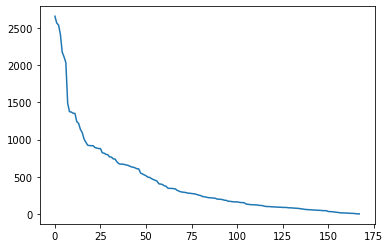

In [45]:
#plt.rcParams["figure.figsize"] = (30,5)
#plt.rcParams.update(plt.rcParamsDefault)
#plt.plot(x,y)
#plt.xticks(x[:top_n], rotation='vertical')

plt.plot(range(len(x)),y)
plt.show()

In [46]:
print(f'{"Type of Event":^20} {"Count"}')

for key,val in dat[:10]:
    print(f'{key:<20} {val}')
    
#[print(f'{key:<20} {val}') for key,val in dat[:10]]

   Type of Event     Count
Causation            2653
Process_start        2562
Attack               2535
Hostile_encounter    2411
Catastrophe          2172
Motion               2109
Competition          2032
Killing              1487
Process_end          1374
Social_event         1369


In [47]:
print(f'{"Type of Event":^20} {"Count"}')

for key,val in dat[-10:]:
    print(f'{key:<20} {val}')
    

   Type of Event     Count
Theft                18
Renting              17
Ingestion            16
Incident             14
Risk                 12
Extradition          11
Institutionalization 11
Emergency            7
Breathing            6
Change_tool          4


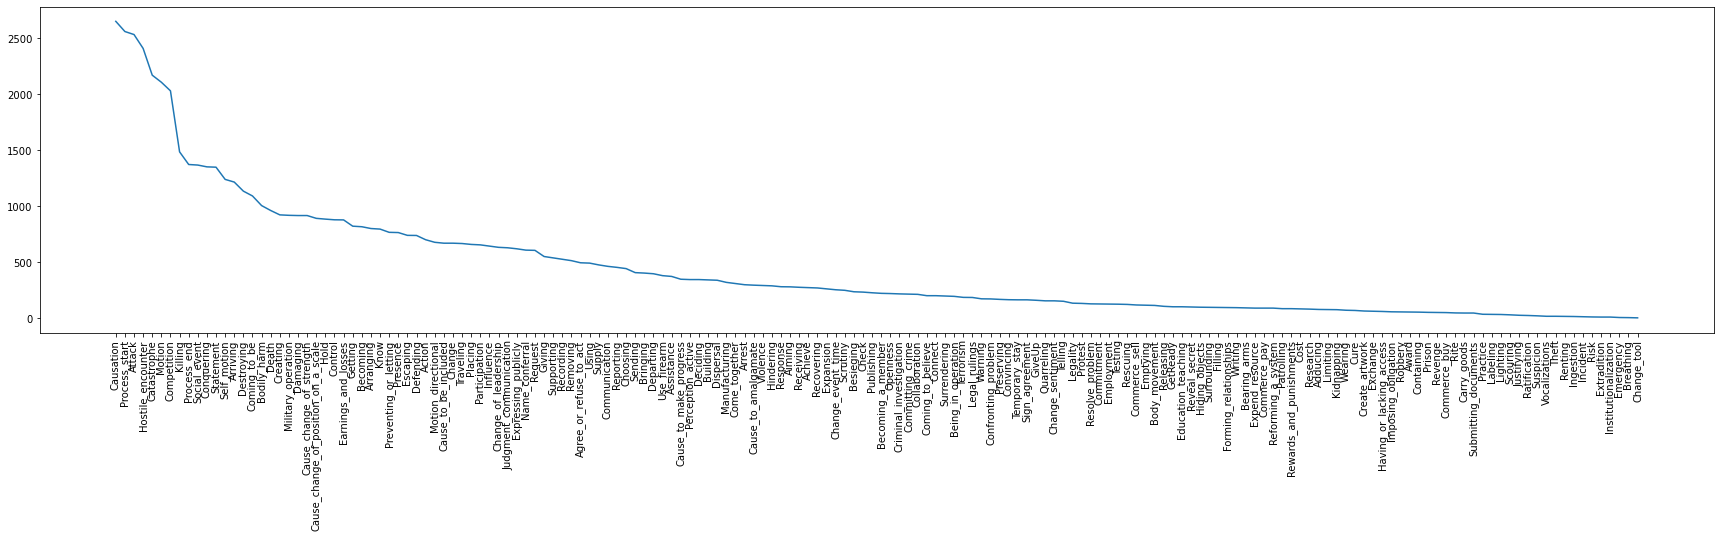

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(x, y)
plt.xticks(rotation='vertical')
plt.show()

In [187]:
print(x[7:50])
print(y[7:50])

['Killing', 'Process_end', 'Social_event', 'Conquering', 'Statement', 'Self_motion', 'Arriving', 'Destroying', 'Coming_to_be', 'Bodily_harm', 'Death', 'Creating', 'Military_operation', 'Damaging', 'Cause_change_of_strength', 'Cause_change_of_position_on_a_scale', 'Hold', 'Control', 'Earnings_and_losses', 'Getting', 'Becoming', 'Arranging', 'Know', 'Preventing_or_letting', 'Presence', 'Escaping', 'Defending', 'Action', 'Motion_directional', 'Cause_to_be_included', 'Change', 'Traveling', 'Placing', 'Participation', 'Influence', 'Change_of_leadership', 'Judgment_communication', 'Expressing_publicly', 'Name_conferral', 'Request', 'Giving', 'Supporting', 'Recording']
[1487, 1374, 1369, 1353, 1350, 1241, 1217, 1136, 1093, 1007, 963, 924, 920, 918, 918, 893, 886, 880, 879, 823, 818, 802, 797, 768, 766, 741, 740, 702, 679, 671, 671, 668, 660, 656, 645, 634, 630, 621, 609, 607, 552, 540, 528]


In [91]:
for key,val in dat:
    if key in ['Change_of_leadership','Choosing', 'Motion','Self_motion', 'Military_operation', 'Hostile_encounter',' Participation', 'Cause_to_be_included']:
        print(f'{key:<20} {val}')
    

Hostile_encounter    2411
Motion               2109
Self_motion          1241
Military_operation   920
Cause_to_be_included 671
Change_of_leadership 634
Choosing             444


In [93]:
train_events[0].keys()

dict_keys(['title', 'id', 'content', 'events', 'negative_triggers'])

In [99]:
train_events[0]['content']
#len(train_events[0]['content'])

[{'sentence': 'The 2006 Pangandaran earthquake and tsunami occurred on July 17 at along a subduction zone off the coast of west and central Java, a large and densely populated island in the Indonesian archipelago.',
  'tokens': ['The',
   '2006',
   'Pangandaran',
   'earthquake',
   'and',
   'tsunami',
   'occurred',
   'on',
   'July',
   '17',
   'at',
   'along',
   'a',
   'subduction',
   'zone',
   'off',
   'the',
   'coast',
   'of',
   'west',
   'and',
   'central',
   'Java',
   ',',
   'a',
   'large',
   'and',
   'densely',
   'populated',
   'island',
   'in',
   'the',
   'Indonesian',
   'archipelago',
   '.']},
 {'sentence': 'The shock had a moment magnitude of 7.7 and a maximum perceived intensity of IV ("Light") in Jakarta, the capital and largest city of Indonesia.',
  'tokens': ['The',
   'shock',
   'had',
   'a',
   'moment',
   'magnitude',
   'of',
   '7.7',
   'and',
   'a',
   'maximum',
   'perceived',
   'intensity',
   'of',
   'IV',
   '(',
   '``',
  

In [100]:
train_events[0]['events']
#len(train_events[0]['events'])

[{'id': '40b3b20bc2eeb6b163538b82c1379ead',
  'type': 'Know',
  'type_id': 1,
  'mention': [{'trigger_word': 'observed',
    'sent_id': 5,
    'offset': [12, 13],
    'id': '7fcf445a679aa13511278d321a908bd2'}]},
 {'id': 'e5fe210baa4cee8d7416ea70029f5dca',
  'type': 'Warning',
  'type_id': 2,
  'mention': [{'trigger_word': 'warning',
    'sent_id': 7,
    'offset': [27, 28],
    'id': 'e44589211d4484950c4638552129a690'}]},
 {'id': 'c4e66add7137585d164f18a0274d84c5',
  'type': 'Catastrophe',
  'type_id': 3,
  'mention': [{'trigger_word': 'earthquake',
    'sent_id': 2,
    'offset': [50, 51],
    'id': '362ab206406caeb847173ca9376da937'}]},
 {'id': 'c5b9506f10e1a5161b159936f376f8a1',
  'type': 'Catastrophe',
  'type_id': 3,
  'mention': [{'trigger_word': 'earthquake',
    'sent_id': 3,
    'offset': [3, 4],
    'id': 'e6f7f136e1d75b60493c37ff4f0a1871'}]},
 {'id': 'fa8170feadff6b9471c0cc2eb052027f',
  'type': 'Catastrophe',
  'type_id': 3,
  'mention': [{'trigger_word': 'earthquake',
    

In [103]:
train_events[0]['content'][3]

{'sentence': 'The July 2006 earthquake was also centered in the Indian Ocean, from the coast of Java, and had a duration of more than three minutes.',
 'tokens': ['The',
  'July',
  '2006',
  'earthquake',
  'was',
  'also',
  'centered',
  'in',
  'the',
  'Indian',
  'Ocean',
  ',',
  'from',
  'the',
  'coast',
  'of',
  'Java',
  ',',
  'and',
  'had',
  'a',
  'duration',
  'of',
  'more',
  'than',
  'three',
  'minutes',
  '.']}

In [104]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='distilbert-base-uncased')
unmasker("Hello I'm a [MASK] model.")

Downloading:   0%|          | 0.00/442 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

[{'sequence': "hello i'm a role model.",
  'score': 0.05292850360274315,
  'token': 2535,
  'token_str': 'role'},
 {'sequence': "hello i'm a fashion model.",
  'score': 0.039685796946287155,
  'token': 4827,
  'token_str': 'fashion'},
 {'sequence': "hello i'm a business model.",
  'score': 0.03474363312125206,
  'token': 2449,
  'token_str': 'business'},
 {'sequence': "hello i'm a model model.",
  'score': 0.034622788429260254,
  'token': 2944,
  'token_str': 'model'},
 {'sequence': "hello i'm a modeling model.",
  'score': 0.018145224079489708,
  'token': 11643,
  'token_str': 'modeling'}]

In [111]:
unmasker("The July 2006 earthquake was also [MASK] in the Indian Ocean, from the coast of Java, and had a duration of more than three minutes.")

[{'sequence': 'the july 2006 earthquake was also recorded in the indian ocean, from the coast of java, and had a duration of more than three minutes.',
  'score': 0.2735970914363861,
  'token': 2680,
  'token_str': 'recorded'},
 {'sequence': 'the july 2006 earthquake was also felt in the indian ocean, from the coast of java, and had a duration of more than three minutes.',
  'score': 0.10167589783668518,
  'token': 2371,
  'token_str': 'felt'},
 {'sequence': 'the july 2006 earthquake was also reported in the indian ocean, from the coast of java, and had a duration of more than three minutes.',
  'score': 0.07679006457328796,
  'token': 2988,
  'token_str': 'reported'},
 {'sequence': 'the july 2006 earthquake was also localized in the indian ocean, from the coast of java, and had a duration of more than three minutes.',
  'score': 0.07167095690965652,
  'token': 22574,
  'token_str': 'localized'},
 {'sequence': 'the july 2006 earthquake was also observed in the indian ocean, from the co

In [177]:
for evt in train_events[0]['events']:
    for mnt in evt['mention']:
        print(mnt)
        sent = train_events[0]['content'][mnt['sent_id']]['tokens']
        print(sent)

{'trigger_word': 'recorded', 'sent_id': 5, 'offset': [12, 13], 'id': '7fcf445a679aa13511278d321a908bd2'}
['Several', 'thousand', 'kilometers', 'to', 'the', 'southeast', ',', 'surges', 'of', 'several', 'meters', 'were', 'recorded', 'in', 'northwestern', 'Australia', ',', 'but', 'in', 'Java', 'the', 'worst', 'runups', '(', 'height', 'above', 'normal', 'sea', 'level', ')', 'were', 'typically', 'and', 'resulted', 'the', 'deaths', 'of', 'more', 'than', '600', 'people', '.']
{'trigger_word': 'disturbance', 'sent_id': 7, 'offset': [27, 28], 'id': 'e44589211d4484950c4638552129a690'}
['since', 'the', 'swell', 'was', 'measured', 'with', 'only', 'moderate', 'intensity', 'well', 'inland', ',', 'and', 'even', 'less', 'so', 'at', 'the', 'shore', ',', 'the', 'surge', 'continued', 'with', 'little', 'or', 'no', 'disturbance', '.']
{'trigger_word': 'quake', 'sent_id': 2, 'offset': [50, 51], 'id': '362ab206406caeb847173ca9376da937'}
['There', 'were', 'no', 'direct', 'indications', 'of', 'the', 'tsunami',

##### There can be several entries within a mention

In [172]:
found = False
for blah in train_events[:10000]:
    if not found:
        for evt in blah['events']:
            if not found:
                if len(evt['mention']) > 1:
                    found = True
                    print(evt['mention'])

[{'trigger_word': 'tsunami', 'sent_id': 2, 'offset': [30, 31], 'id': '427bb797855493e6164e7f300e1d3be6'}, {'trigger_word': 'tsunami', 'sent_id': 0, 'offset': [5, 6], 'id': '6e89dee6e1778e7697915d88f4a5feae'}]


#### Transforming trigger_words using BERT MLM to generate alternate data samples

In [176]:
import random
import re
for evt in train_events[0]['events']:
    for mnt in evt['mention']:
#        print(mnt)
        sent = train_events[0]['content'][mnt['sent_id']]
        toks = sent['tokens'].copy()
#        print(toks)
#        print(len(toks))
        start = mnt['offset'][0]
        end = mnt['offset'][1]
        orig_word = toks[start]
        del toks[start:end]
        toks.insert(start, '[MASK]')
        temp = ' '.join(toks)
        candidates = unmasker(temp)
        out = random.choice(candidates)
        toks[start] = out['token_str']
#        print(len(toks))
#        print(toks)
        sent['tokens'] = toks
        mnt['trigger_word'] = out['token_str']
        mnt['offset'] = [start, start+1]
        print(mnt)

{'trigger_word': 'recorded', 'sent_id': 5, 'offset': [12, 13], 'id': '7fcf445a679aa13511278d321a908bd2'}
{'trigger_word': 'disturbance', 'sent_id': 7, 'offset': [27, 28], 'id': 'e44589211d4484950c4638552129a690'}
{'trigger_word': 'quake', 'sent_id': 2, 'offset': [50, 51], 'id': '362ab206406caeb847173ca9376da937'}
{'trigger_word': 'eruption', 'sent_id': 3, 'offset': [3, 4], 'id': 'e6f7f136e1d75b60493c37ff4f0a1871'}
{'trigger_word': 'tsunami', 'sent_id': 2, 'offset': [7, 8], 'id': 'df2bea73a9a9fa25cd18d424e5ae4baf'}
{'trigger_word': 'reported', 'sent_id': 3, 'offset': [6, 7], 'id': '4cec3a7de5f6404b68cac3a6db6fc19f'}
{'trigger_word': 'tsunami', 'sent_id': 4, 'offset': [21, 22], 'id': '50b66b46ce5dd8f4131f440977249085'}
{'trigger_word': 'hazard', 'sent_id': 4, 'offset': [34, 35], 'id': 'daa4c8e50ff4f58d792113858be1fa91'}
{'trigger_word': 'resulted', 'sent_id': 5, 'offset': [33, 34], 'id': 'a4706465c333e8a5720bb4fd829d7646'}
{'trigger_word': 'continued', 'sent_id': 7, 'offset': [22, 23], '

In [178]:
train_events[0]

{'title': '2006 Pangandaran earthquake and tsunami',
 'id': '8307a6b61b84d4eea42c1dd5e6e2cdba',
 'content': [{'sentence': 'The 2006 Pangandaran earthquake and tsunami occurred on July 17 at along a subduction zone off the coast of west and central Java, a large and densely populated island in the Indonesian archipelago.',
   'tokens': ['The',
    '2006',
    'Pangandaran',
    'earthquake',
    'and',
    'tremor',
    'originated',
    'on',
    'July',
    '17',
    'at',
    'along',
    'a',
    'subduction',
    'zone',
    'off',
    'the',
    'coast',
    'of',
    'west',
    'and',
    'central',
    'Java',
    ',',
    'a',
    'large',
    'and',
    'densely',
    'populated',
    'island',
    'in',
    'the',
    'Indonesian',
    'archipelago',
    '.']},
  {'sentence': 'The shock had a moment magnitude of 7.7 and a maximum perceived intensity of IV ("Light") in Jakarta, the capital and largest city of Indonesia.',
   'tokens': ['The',
    'typhoon',
    'had',
    'a'